In [356]:
# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import iqr
from scipy.stats import linregress
import numpy as np
import pylab as pl

In [357]:
# read in the collision collisions data set
collision = pd.read_csv('pd_collisions_datasd_v1.csv')
collision.head()

,report_id,date_time,police_beat,address_number_primary,address_pd_primary,address_road_primary,address_sfx_primary,address_pd_intersecting,address_name_intersecting,address_sfx_intersecting,violation_section,violation_type,charge_desc,injured,killed,hit_run_lvl
0,180282,2018-01-01 00:30:00,124,6500,,EL CAMINO DE TEATRO,,,,,22350,VC,VIOLATION OF BASIC SPEED LAW SPEED UNSAFE FOR ...,0,0,NaN
1,180310,2018-01-01 01:00:00,616,500,,ROSECRANS,STREET,,,,22350,VC,VIOLATION OF BASIC SPEED LAW SPEED UNSAFE FOR ...,0,0,MISDEMEANOR
2,180573,2018-01-01 01:26:00,721,0,,PALM,AVENUE,,18TH,STREET,21954A,VC,PEDESTRIANS OUTSIDE CROSSWALKS,0,1,NaN
3,180317,2018-01-01 02:05:00,512,3100,,LOGAN,AVENUE,,,,22450(A),VC,STOP REQUIREMENTS STATE STOP LINE,0,0,MISDEMEANOR
4,180319,2018-01-01 02:26:00,439,6200,,DIVISION,STREET,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,MISDEMEANOR


In [358]:
# split date/time column to have time exist 
collision_deadly_df = collision["date_time"].str.split(" ", n=2, expand=True)

collision["time"] = collision_deadly_df[1]
# collision.head()

# make new dataframe that consists of only the necessary components to analyze deadliest charge descriptions 
grim_reaper_df = collision[['charge_desc', 'injured', 'killed', 'time']]
grim_reaper_df

,charge_desc,injured,killed,time
0,VIOLATION OF BASIC SPEED LAW SPEED UNSAFE FOR ...,0,0,00:30:00
1,VIOLATION OF BASIC SPEED LAW SPEED UNSAFE FOR ...,0,0,01:00:00
2,PEDESTRIANS OUTSIDE CROSSWALKS,0,1,01:26:00
3,STOP REQUIREMENTS STATE STOP LINE,0,0,02:05:00
4,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,02:26:00
...,...,...,...,...
21752,FOLLOWING TOO CLOSELY (I),1,0,07:09:00
21753,TURNS:UNSAFE TURN AND/OR NO TURN SIGNAL (I),0,0,07:30:00
21754,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,12:14:00
21755,SIGNAL LIGHTS:CIRCULAR RED (I),2,0,17:45:00


In [359]:
#data frame to observe collisions with highest number of deaths associated with it
collision_group = grim_reaper_df.groupby(["charge_desc"])
collision_kill_count = collision_group["killed"].count
collision_total_kills = collision_group["killed"].sum()

#new dataframe for death stats
killed_stats_df = pd.DataFrame({"Total Killed": collision_total_kills})

#show collisions with 10 highest amounts of killed
killed_stats_df.nlargest(10, ["Total Killed"]) 


,Total Killed
charge_desc,
PEDESTRIANS OUTSIDE CROSSWALKS,13
MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHICLE CODE,12
TURNING MOVEMENTS AND REQUIRED SIGNALS,11
VIOLATION OF BASIC SPEED LAW SPEED UNSAFE FOR CONDITIONS,8
UNSAFE SPEED (BASIC SPEED LAW) (I),7
YIELD RIGHT OF WAY TO PEDESTRIANS,7
RIGHT-OF-WAY:PED NOT IN CROSSWALK YIELD TO VEHS (I),6
TURNS:UNSAFE TURN AND/OR NO TURN SIGNAL (I),6
SIGNAL LIGHTS:CIRCULAR RED (I),5


In [360]:
#data frame to observe collisions with highest number of deaths associated with it
collision_group = grim_reaper_df.groupby(["charge_desc"])
collision_injured_count = collision_group["injured"].count
collision_total_injured = collision_group["injured"].sum()

#new dataframe for death stats
injured_stats_df = pd.DataFrame({"Total Injured": collision_total_injured})

#show collisions with 10 highest amounts of injuries
injured_stats_df.nlargest(10, ["Total Injured"])


,Total Injured
charge_desc,
TURNING MOVEMENTS AND REQUIRED SIGNALS,1405
VIOLATION OF BASIC SPEED LAW SPEED UNSAFE FOR CONDITIONS,1403
MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHICLE CODE,1057
RED OR STOPVEHICLES STOP AT LIMIT LINE,963
UNSAFE SPEED (BASIC SPEED LAW) (I),885
SIGNAL LIGHTS:CIRCULAR RED (I),687
TURNS:UNSAFE TURN AND/OR NO TURN SIGNAL (I),656
LEFT TURN YIELD UNTIL SAFE OR U-TURN,490
FOLLOWING TOO CLOSELY,416


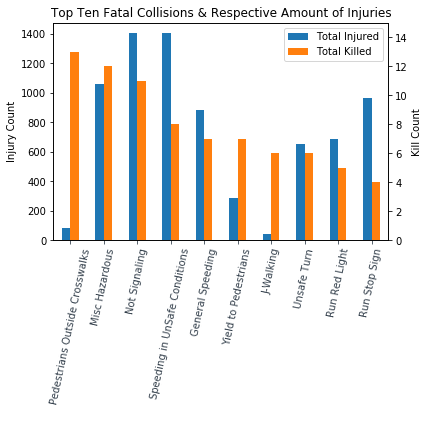

<Figure size 432x288 with 0 Axes>

In [368]:
# merge dataframes together
killed_injured_merged_df = pd.merge(injured_stats_df, death_stats_df, on="charge_desc")

ax = killed_injured_merged_df.nlargest(10, ["Total Killed"]).plot(kind="bar")
ax2 = ax.twinx()
for r in ax.patches[len(killed_injured_merged_df.nlargest(10, ["Total Killed"])):]:
    r.set_transform(ax2.transData)
ax2.set_ylim(0, 15); 
ax.set_ylabel("Total Injured")
ax2.set_ylabel("Total Killed")

# set labels to top 10 collisions by killed count "fatality"
ax.set_xticklabels(["Pedestrians Outside Crosswalks", "Misc Hazardous", "Not Signaling", "Speeding in UnSafe Conditions", "General Speeding", "Yield to Pedestrians","J-Walking", "Unsafe Turn", "Run Red Light", "Run Stop Sign"  ], rotation=78)

# axis and title labeling
ax.set_xlabel(' ')
ax.set_ylabel('Injury Count')
ax2.set_ylabel('Kill Count')
ax.set_title('Top Ten Fatal Collisions & Respective Amount of Injuries')

plt.show()
plt.savefig('double_bar.jpeg')


### Most common time of the day for DUI’s

In [362]:
# create new data frame with dui information needed 
dumb_driving_df = pd.DataFrame(collision)

# search words 
dui_words = ["DUI"]

#make df only include the multiple kinds of DUIs, drugs and alcohol
dui_df = dumb_driving_df[dumb_driving_df['charge_desc'].str.contains("|".join(dui))]
dui_df.head()


,report_id,date_time,police_beat,address_number_primary,address_pd_primary,address_road_primary,address_sfx_primary,address_pd_intersecting,address_name_intersecting,address_sfx_intersecting,violation_section,violation_type,charge_desc,injured,killed,hit_run_lvl,time
28,181041,2018-01-02 01:22:00,436,0,,MIGUEL VISTA,PLACE,,PARKBROOK,WAY,23152(F),VC,DUI DRUGS,0,0,MISDEMEANOR,01:22:00
155,180455,2018-01-08 01:35:00,115,4000,,LA JOLLA VILLAGE,DRIVE,,,,23152A,VC,DUI ALCOHOL,0,0,NaN,01:35:00
222,180516,2018-01-10 15:45:00,821,6500,,EL CAJON,BOULEVARD,,,,23152(F),VC,DUI DRUGS,0,0,NaN,15:45:00
230,180566,2018-01-10 20:30:00,623,1800,,HOTEL SOUTH,CIRCLE,,,,23152A,VC,DUI ALCOHOL,0,0,NaN,20:30:00
626,180969,2018-01-26 18:39:00,122,2200,,GARNET,AVENUE,,,,23152A,VC,DUI ALCOHOL,1,0,NaN,18:39:00


In [363]:
# line graph for duis per time of the day

# split date_time column 
date_time = dumb_driver_df.date_time.str.split(expand=True)

date_time = date_time.rename(columns={0:'date', 1:'time'})

# pull out hour and store into seperate df
date_time['time'] = pd.to_datetime(date_time.time)
date_time.dtypes
time = date_time.time.dt.hour

# merge time df of just the hour with previous df 
dui_time_df = dui_df.merge(time, left_index = True, right_index = True)
dui_time_df.head()

#df with only necessary fields
dui_hour_df = dui_time_df[['charge_desc', 'injured', 'killed', 'time_y']]
dui_hour_df.head()

# set counter to 1 so that the number of DUI hits can be properly counted 
dui_hour_df["counter"] = 1

dui_hour_df.head()

C:\Users\trevor.sauerbrey\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,charge_desc,injured,killed,time_y,counter
28,DUI DRUGS,0,0,1,1
155,DUI ALCOHOL,0,0,1,1
222,DUI DRUGS,0,0,15,1
230,DUI ALCOHOL,0,0,20,1
626,DUI ALCOHOL,1,0,18,1


In [364]:
# bin hours
bins = [0, 0.9, 1.9, 2.9, 3.9, 4.9, 5.9, 6.9, 7.9, 8.9, 9.9, 10.9, 11.9, 12.9, 13.9, 14.9, 15.9, 16.9, 17.9, 18.9,
       19.9, 20.9, 21.9, 22.9, 24]

# set labels for bins
labels = ['12am-1am', '1am-2am', '2am-3am', '3am-4am', '4am-5am', '5am-6am', '6am-7am',
         '7am-8am', '8am-9am', '9am-10am', '10am-11am', '11am-12pm', '12pm-1pm', '1pm-2pm',
         '2pm-3pm', '3pm-4pm', '4pm-5pm', '5pm-6pm', '6pm-7pm', '7pm-8pm', '8pm-9pm',
         '9pm-10pm', '10pm-11pm', '11pm-12am']

# fill na
dui_complete = dui_hour_df.fillna("12am-1am")

# set labels to bins
dui_hour_df["Hour"] = pd.cut(dui_hour_df.time_y, bins=bins, labels = labels)

dui_complete

C:\Users\trevor.sauerbrey\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,charge_desc,injured,killed,time_y,counter,Hour
28,DUI DRUGS,0,0,1,1,1am-2am
155,DUI ALCOHOL,0,0,1,1,1am-2am
222,DUI DRUGS,0,0,15,1,3pm-4pm
230,DUI ALCOHOL,0,0,20,1,8pm-9pm
626,DUI ALCOHOL,1,0,18,1,6pm-7pm
...,...,...,...,...,...,...
21678,DUI ALC/0.08 PERCENT (M),0,0,17,1,5pm-6pm
21685,DUI ALCOHOL (M),0,0,1,1,1am-2am
21697,DUI ALCOHOL (M),1,0,19,1,7pm-8pm
21747,DUI ALC/0.08 PERCENT (M),0,0,1,1,1am-2am


In [365]:
#grouped by time 

groupedby_time_df = dui_complete.groupby("time_y")

# add up values from the DUI counter and add to the bin value / time frame
dui_counts = groupedby_time["counter"].sum()
dui_counts = pd.DataFrame(dui_counts)
dui_dataframe = dui_counts.reset_index()
dui_dataframe

dui_hour_bins = dui_hour_df.groupby("Hour")
timeframes = dui_hour_bins["counter"].sum()
time_bins = timeframes.reset_index()
time_bins


,Hour,counter
0,12am-1am,0
1,1am-2am,44
2,2am-3am,43
3,3am-4am,20
4,4am-5am,9
5,5am-6am,4
6,6am-7am,3
7,7am-8am,6
8,8am-9am,5
9,9am-10am,6


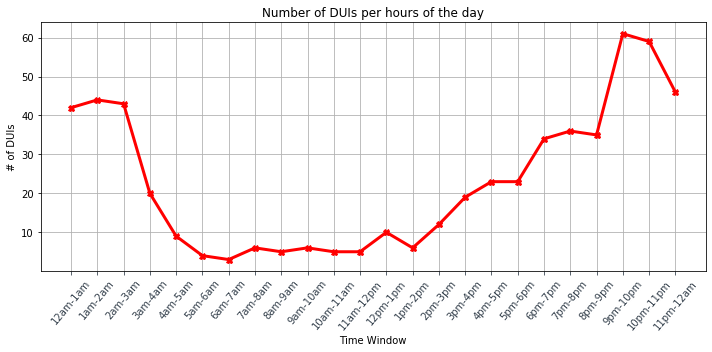

In [367]:
# line plot 
plt.figure(figsize=(10,5))
plt.plot(x_axis, y_axis, marker="X", color="red", linewidth=3)

#set x axis as time
x_axis = dui_dataframe.time_y
# tick locations as time frames "bins"
tick_locations = [value for value in x_axis]

# set y axis to the counter amount created for number of DUIs
y_axis = dui_dataframe.counter

#formatting
plt.title("Number of DUIs per hours of the day")
plt.xticks(tick_locations, time_bins.Hour, rotation=50)
plt.xlabel("Time Window")
plt.ylabel("# of DUIs")
plt.tight_layout()
plt.grid()

plt.savefig("dui_line_graph.png")